In [1]:
import os
import cv2

# Define the directories
car_dir = 'car'
bike_dir = 'bike'

# Initialize lists to store the images and labels
images = []
labels = []

# Load car images
for filename in os.listdir(car_dir):
    img = cv2.imread(os.path.join(car_dir, filename))
    if img is not None:
        images.append(img)
        labels.append('car')

# Load bike images
for filename in os.listdir(bike_dir):
    img = cv2.imread(os.path.join(bike_dir, filename))
    if img is not None:
        images.append(img)
        labels.append('bike')


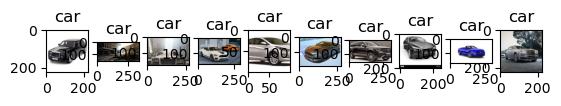

In [2]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images):
    for i in range(num_images):
        plt.subplot(2, num_images, i+1)
        plt.imshow(images[i])
        plt.title(labels[i])
    plt.show()

# Display some images from the dataset
display_images(images[:10], labels[:10], 10)


In [3]:
from collections import Counter

# Count the number of images in each class
counter = Counter(labels)

# Display the class distribution
print(counter)


Counter({'car': 2000, 'bike': 2000})


In [4]:
# Get the sizes of the images
sizes = [img.shape for img in images]

# Display some statistics about the image sizes
print('Min size:', min(sizes))
print('Max size:', max(sizes))


Min size: (81, 144, 3)
Max size: (5840, 3822, 3)


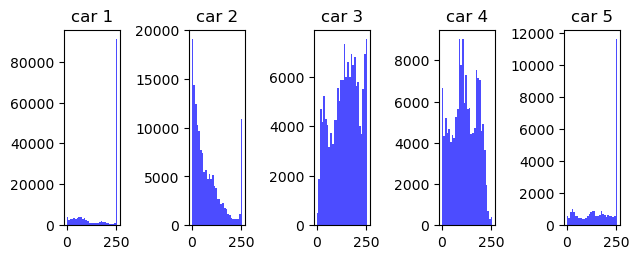

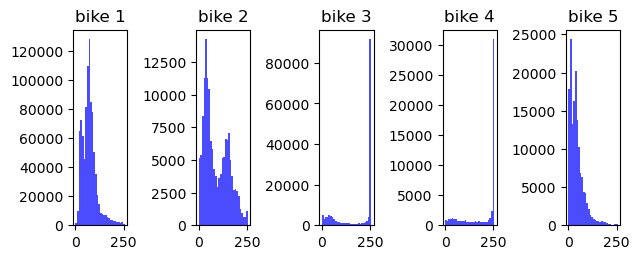

In [5]:
# Select the first 5 car images
car_images = images[labels.index('car'):labels.index('car')+5]

# Select the first 5 bike images
bike_images = images[labels.index('bike'):labels.index('bike')+5]

# Function to plot pixel distribution for a list of images
def plot_pixel_distribution(images, title):
    for i, image in enumerate(images):
        plt.subplot(2, 5, i+1)
        plt.hist(image.flatten(), bins=30, color='blue', alpha=0.7)
        plt.title(f'{title} {i+1}')
    plt.tight_layout()
    plt.show()

# Plot pixel distribution for car images
plot_pixel_distribution(car_images, 'car')

# Plot pixel distribution for bike images
plot_pixel_distribution(bike_images, 'bike')


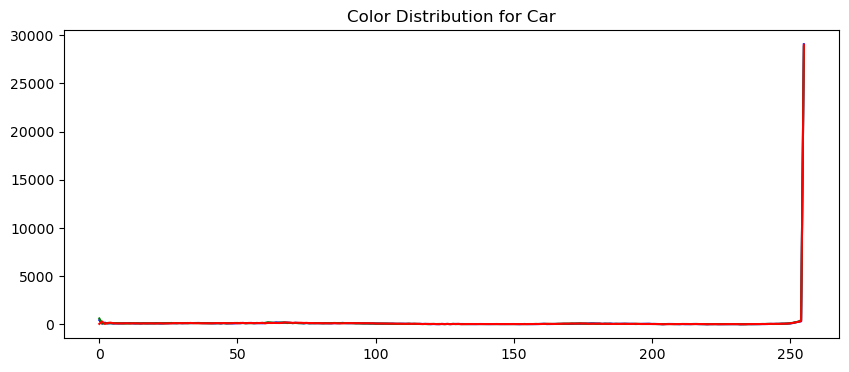

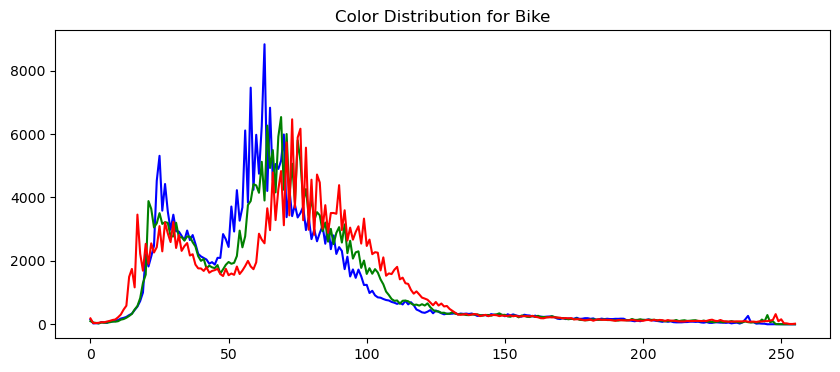

In [6]:
import numpy as np

def plot_color_distribution(image, title):
    # Split the image into its color channels
    channels = cv2.split(image)

    # Create a histogram for each channel
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(10, 4))
    for i, color in enumerate(colors):
        histogram = cv2.calcHist([channels[i]], [0], None, [256], [0, 256])
        plt.plot(histogram, color=color)
    plt.title(f'Color Distribution for {title}')
    plt.show()

# Plot color distribution for a car image
plot_color_distribution(car_images[0], 'Car')

# Plot color distribution for a bike image
plot_color_distribution(bike_images[0], 'Bike')


In [7]:
def calculate_brightness(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the average brightness
    brightness = np.mean(gray_image)
    return brightness

# Calculate brightness for all images
brightness = [calculate_brightness(img) for img in images]

# Display some statistics about the brightness
print('Min brightness:', min(brightness))
print('Max brightness:', max(brightness))
print('Average brightness:', np.mean(brightness))


Min brightness: 4.505092703111323
Max brightness: 240.41455645803472
Average brightness: 126.86340617136115


In [8]:
def calculate_contrast(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the contrast (standard deviation)
    contrast = np.std(gray_image)
    return contrast

# Calculate contrast for all images
contrast = [calculate_contrast(img) for img in images]

# Display some statistics about the contrast
print('Min contrast:', min(contrast))
print('Max contrast:', max(contrast))
print('Average contrast:', np.mean(contrast))


Min contrast: 15.109926698920725
Max contrast: 112.54390759193595
Average contrast: 68.98483261686484


In [9]:
def resize_images(images, size=(64, 64)):
    return [cv2.resize(image, size) for image in images]

# Resize the images
images = resize_images(images)


In [10]:
images = [image/255. for image in images]


In [11]:
labels = [0 if label == 'car' else 1 for label in labels]


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [15]:
print('Data type of X_train:', X_train.dtype)
print('Data type of y_train:', y_train.dtype)
print('Data type of X_test:', X_test.dtype)
print('Data type of y_test:', y_test.dtype)


Data type of X_train: float64
Data type of y_train: int64
Data type of X_test: float64
Data type of y_test: int64


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2024-02-02 20:16:21.766506: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
print('Unique values in y_train:', np.unique(y_train))
print('Unique values in y_test:', np.unique(y_test))

Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


25/25 [==============================] - 1s 28ms/step - loss: 0.6930 - accuracy: 0.4950
Test Loss: 0.6929550170898438
Test Accuracy: 0.4950000047683716


In [20]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)


Shape of X_train: (3200, 64, 64, 3)
Shape of X_test: (800, 64, 64, 3)


In [22]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
100/100 [==============================] - 12s 116ms/step - loss: 0.4011 - accuracy: 0.8181 - val_loss: 0.2589 - val_accuracy: 0.8825
Epoch 2/10
100/100 [==============================] - 12s 119ms/step - loss: 0.2211 - accuracy: 0.9091 - val_loss: 0.2338 - val_accuracy: 0.8975
Epoch 3/10
100/100 [==============================] - 11s 113ms/step - loss: 0.1745 - accuracy: 0.9291 - val_loss: 0.1760 - val_accuracy: 0.9262
Epoch 4/10
100/100 [==============================] - 12s 117ms/step - loss: 0.1253 - accuracy: 0.9538 - val_loss: 0.2166 - val_accuracy: 0.9150
Epoch 5/10
100/100 [==============================] - 12s 121ms/step - loss: 0.0907 - accuracy: 0.9666 - val_loss: 0.1672 - val_accuracy: 0.9337
Epoch 6/10
100/100 [==============================] - 11s 113ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.1590 - val_accuracy: 0.9438
Epoch 7/10
100/100 [==============================] - 12s 116ms/step - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.2059 - val_ac

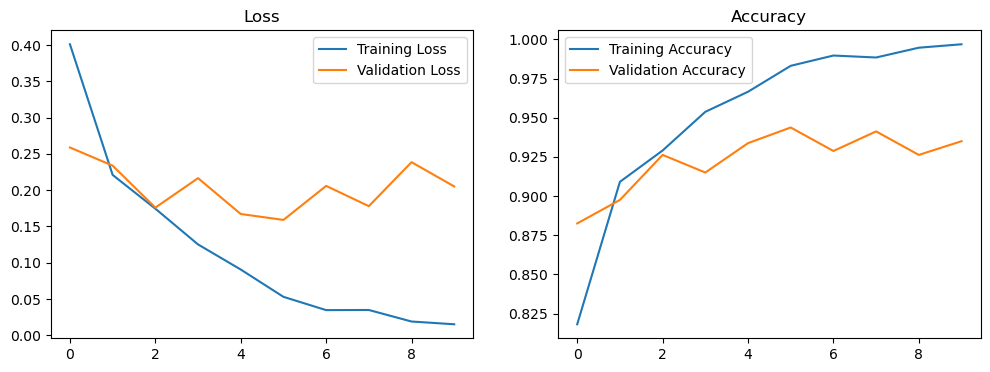

In [23]:
# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


25/25 [==============================] - 1s 27ms/step - loss: 0.2051 - accuracy: 0.9350
Test Loss: 0.2051471471786499
Test Accuracy: 0.9350000023841858


In [25]:
from sklearn.metrics import classification_report

# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Car', 'Bike']))


25/25 [==============================] - 1s 28ms/step
              precision    recall  f1-score   support

         Car       0.94      0.94      0.94       422
        Bike       0.93      0.93      0.93       378

    accuracy                           0.94       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.94      0.93       800



In [26]:
# Save the model
model.save('model.keras')
